In [1]:
import matplotlib.pyplot as plt
from evaluator import Evaluator
from generator import Generator
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from models import NIC
from data_manager import DataManager
from keras.models import load_model

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)
plt.rcParams['image.interpolation'] = 'nearest'

ImportError: No module named 'evaluator'

# Data preprocessing

In [2]:
num_epochs = 500
batch_size = 256
root_path = '../datasets/IAPR_2012/'
captions_filename = root_path + 'IAPR_2012_captions.txt'
data_manager = DataManager(data_filename=captions_filename,
                            max_caption_length=30,
                            word_frequency_threshold=2,
                            extract_image_features=False,
                            cnn_extractor='inception',
                            image_directory=root_path + 'iaprtc12/',
                            split_data=True,
                            dump_path=root_path + 'preprocessed_data/')

In [3]:
data_manager.preprocess()
print(data_manager.captions[0])
print(data_manager.word_frequencies[0:20])

Loading data ...
Loaded 19625 captions
Removing captions longer than 30 ...
Number of files removed: 1047
Current number of files: 18578
Removing words with a frequency less than 2 ...
Number of words removed: 1971
Current number of words: 2166
['a', 'man', 'behind', 'a', 'donkey', 'on', 'a', 'slope', 'with', 'a', 'few', 'bushes']
[['a' '40160']
 ['and' '14910']
 ['in' '14609']
 ['with' '14211']
 ['the' '11373']
 ['on' '9232']
 ['of' '8381']
 ['brown' '6398']
 ['are' '5271']
 ['grey' '5163']
 ['is' '4111']
 ['white' '3594']
 ['green' '3447']
 ['standing' '3447']
 ['foreground' '3228']
 ['blue' '2803']
 ['black' '2697']
 ['at' '2651']
 ['front' '2505']
 ['two' '2455']]


In [4]:
preprocessed_data_path = root_path + 'preprocessed_data/'
generator = Generator(data_path=preprocessed_data_path,
                      batch_size=batch_size)

num_training_samples =  generator.training_dataset.shape[0]
num_validation_samples = generator.validation_dataset.shape[0]
print('Number of training samples:', num_training_samples)
print('Number of validation samples:', num_validation_samples)

Loading training dataset...
Loading validation dataset...
Loading vocabulary...
Number of training samples: 11889
Number of validation samples: 2973


# NIC model specifications

In [5]:
model = NIC(max_token_length=generator.MAX_TOKEN_LENGTH,
            vocabulary_size=generator.VOCABULARY_SIZE,
            rnn='gru',
            num_image_features=generator.IMG_FEATS,
            hidden_size=256,
            embedding_size=256)

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

print(model.summary())
print('Number of parameters:', model.count_params())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
text (InputLayer)                (None, 32, 2169)      0                                            
____________________________________________________________________________________________________
text_mask (Masking)              (None, 32, 2169)      0           text[0][0]                       
____________________________________________________________________________________________________
image (InputLayer)               (None, 32, 2048)      0                                            
____________________________________________________________________________________________________
time_distributed_1 (TimeDistribu (None, 32, 256)       555520      text_mask[0][0]                  
___________________________________________________________________________________________

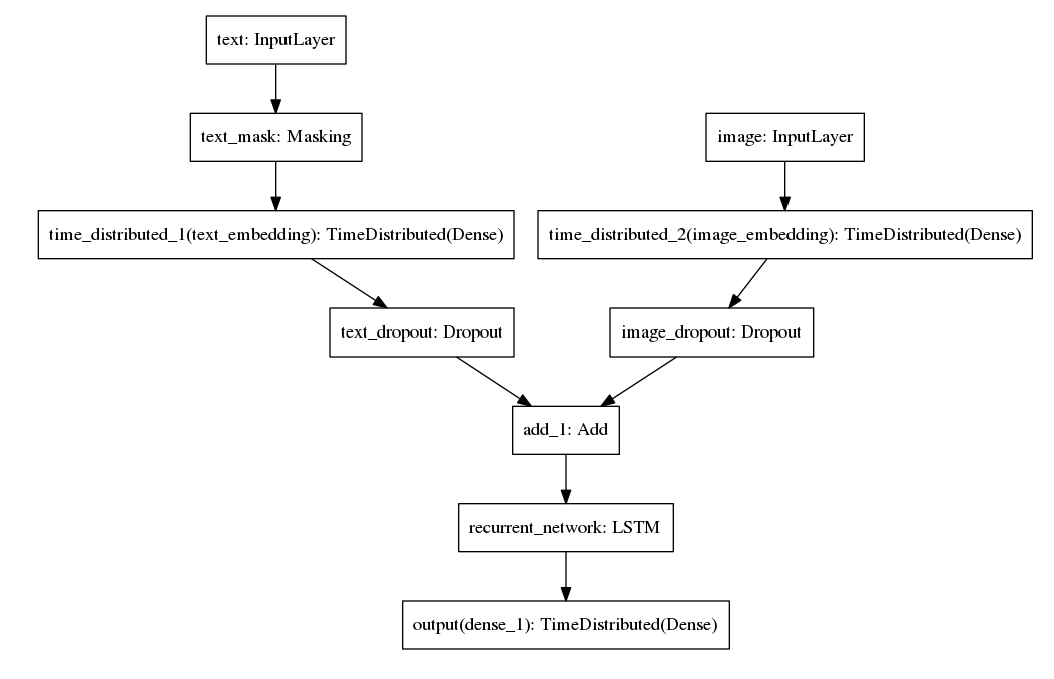

In [6]:
image = plt.imread('../images/NIC.png')
plt.imshow(image)
plt.axis('off')
plt.show()

# Testing model

In [30]:
root_path = '../datasets/IAPR_2012/'
data_path = root_path + 'preprocessed_data/'
images_path = root_path + 'iaprtc12/'
model_filename = '../trained_models/IAPR_2012/iapr_weights.90-1.99.hdf5'
model = load_model(model_filename)
evaluator = Evaluator(model, data_path, images_path)

<S>
a
waterfall
over
grey
rocks
in
the
middle
of
a
jungle
<E>


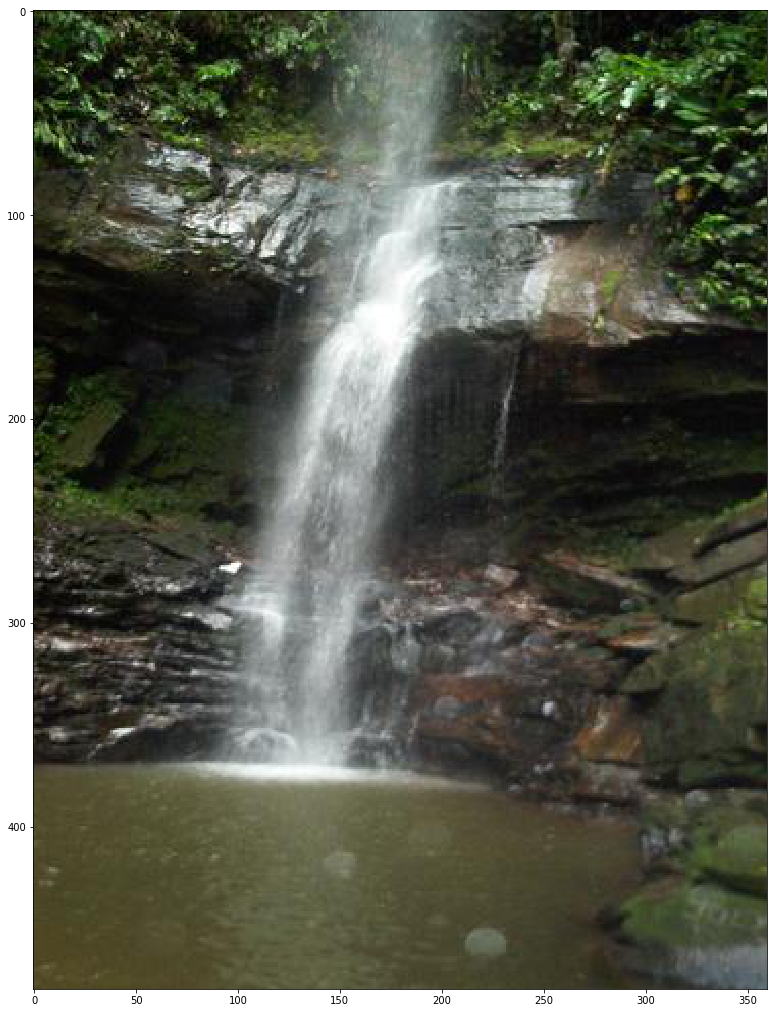

In [31]:
evaluator.display_caption()

<S>
a
brown
bridge
of
a
man
on
a
grey
base
in
front
of
a
grey
cathedral
<E>


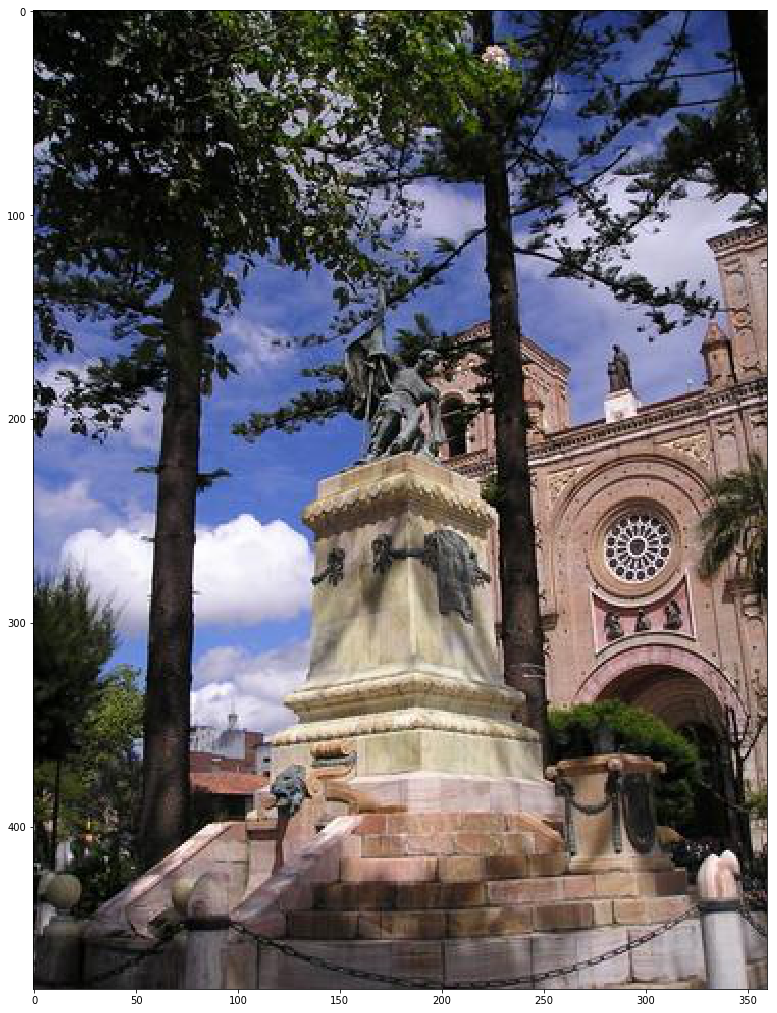

In [34]:
evaluator.display_caption()

<S>
a
brown
rock
in
the
middle
of
a
flat
dry
desert
landscape
<E>


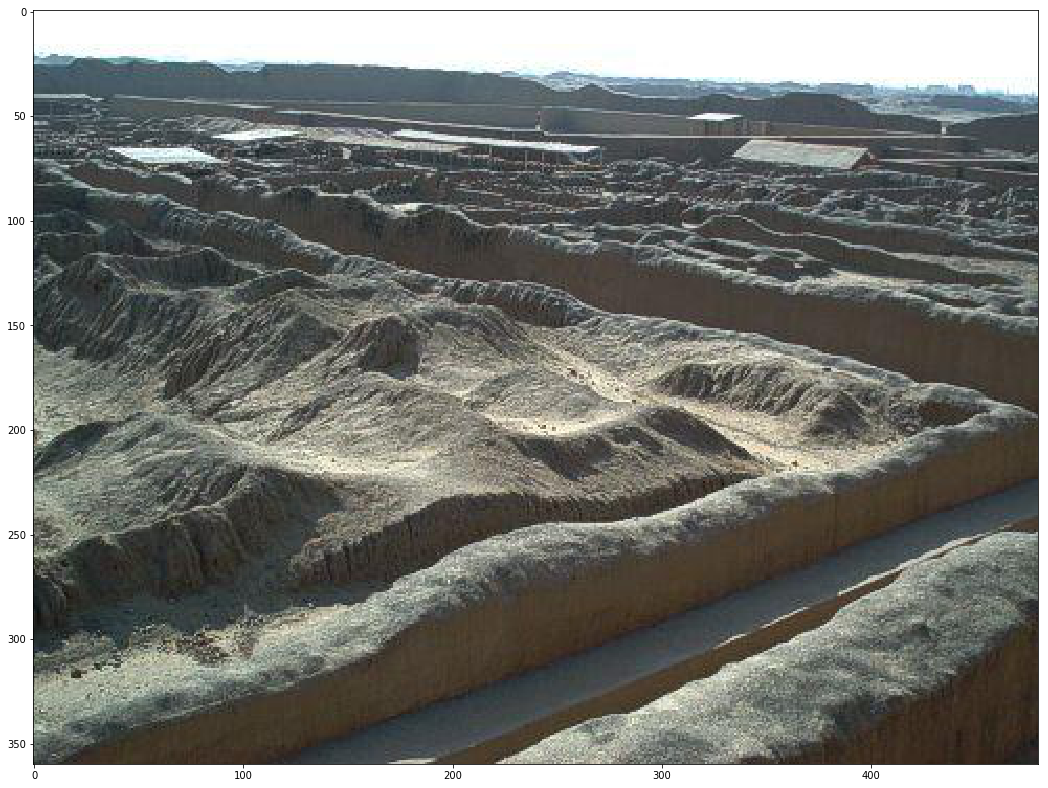

In [35]:
evaluator.display_caption()

<S>
a
gravel
road
in
a
forest
with
a
wooded
slope
in
the
background
<E>


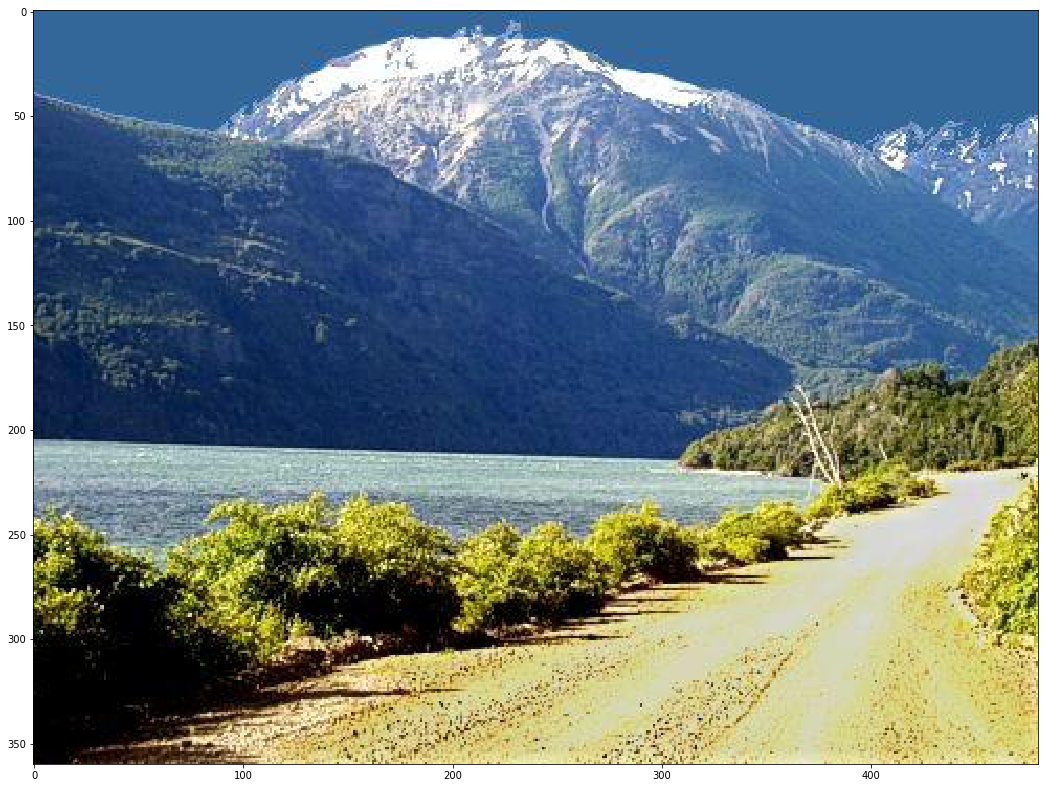

In [44]:
evaluator.display_caption()

<S>
tourists
are
sitting
at
a
long
table
with
a
white
table
rope
<E>


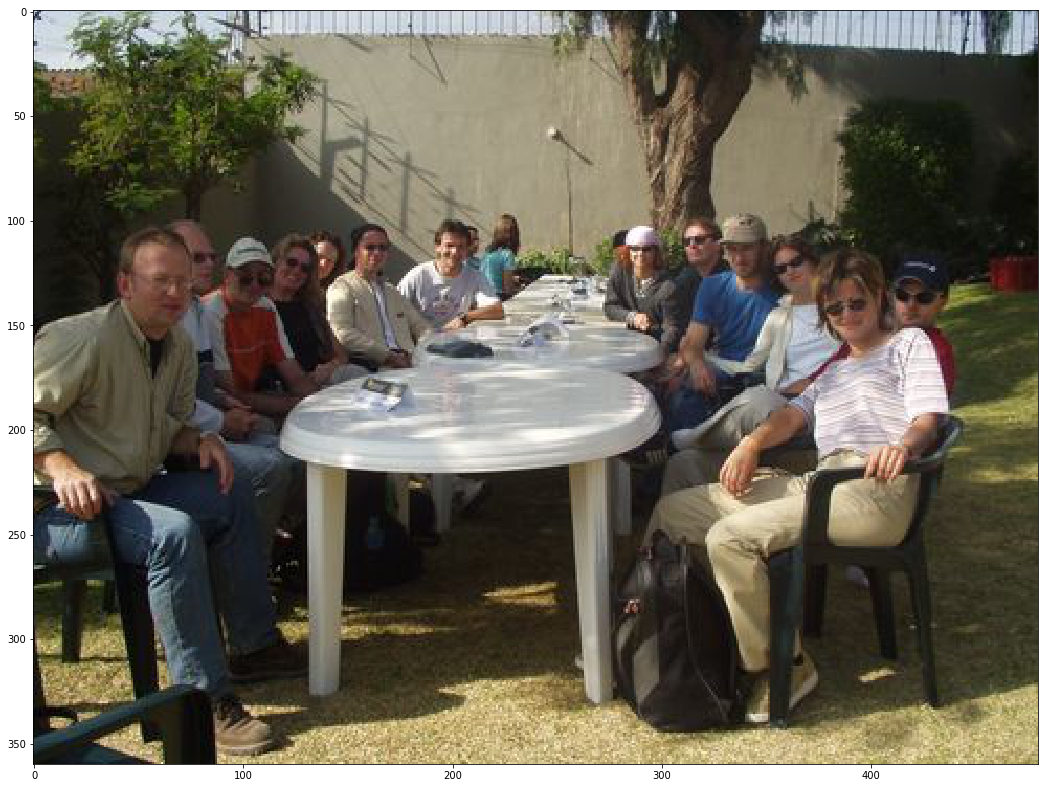

In [45]:
evaluator.display_caption()

<S>
a
white
ship
with
a
blue
roof
and
a
blue
ship
in
the
foreground
<E>


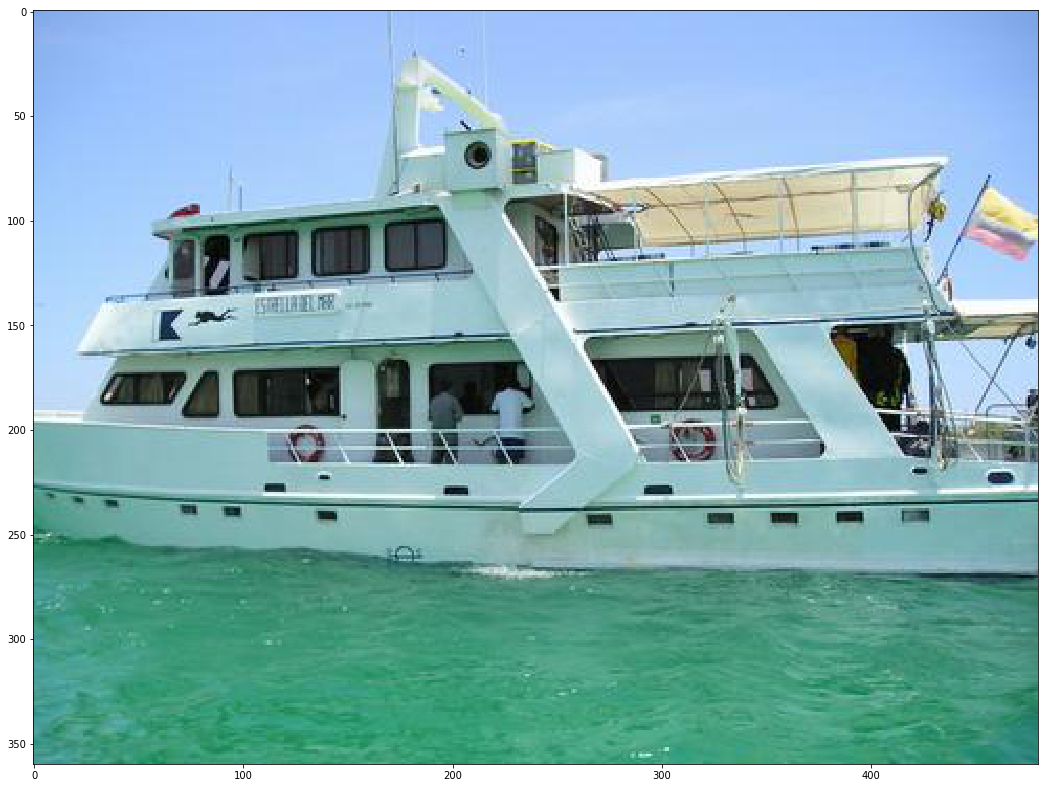

In [46]:
evaluator.display_caption()

## It does not seem to be to good with persons...

<S>
a
brown
breaking
is
standing
on
a
brown
dirt
road
in
the
middle
of
a
<E>


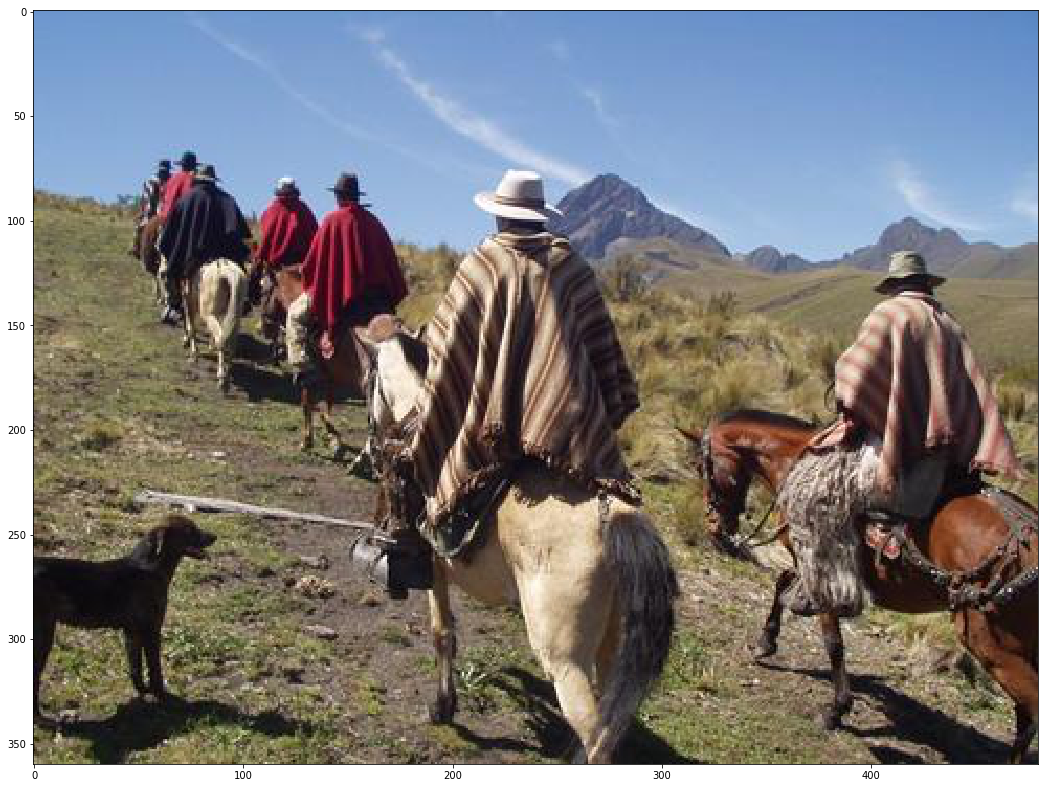

In [49]:
evaluator.display_caption()

<S>
tourists
are
sitting
on
a
white
table
in
a
room
with
blue
seats
<E>


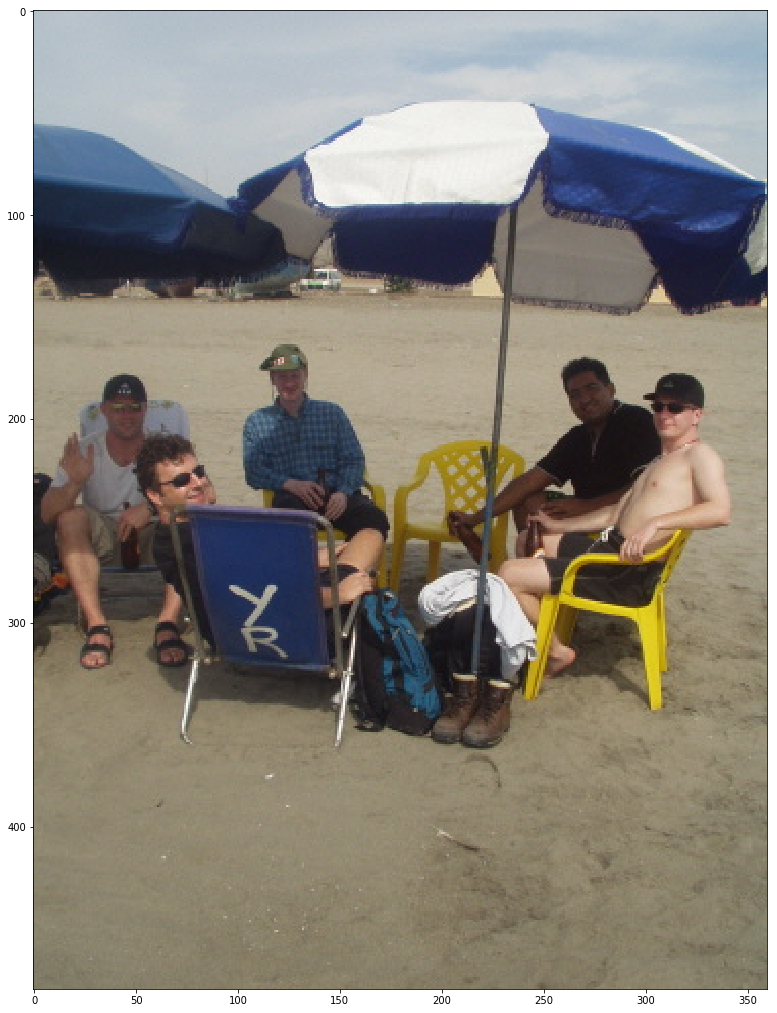

In [53]:
evaluator.display_caption()

<S>
a
man
and
a
woman
are
standing
in
front
of
a
brown
wall
in
the
<E>


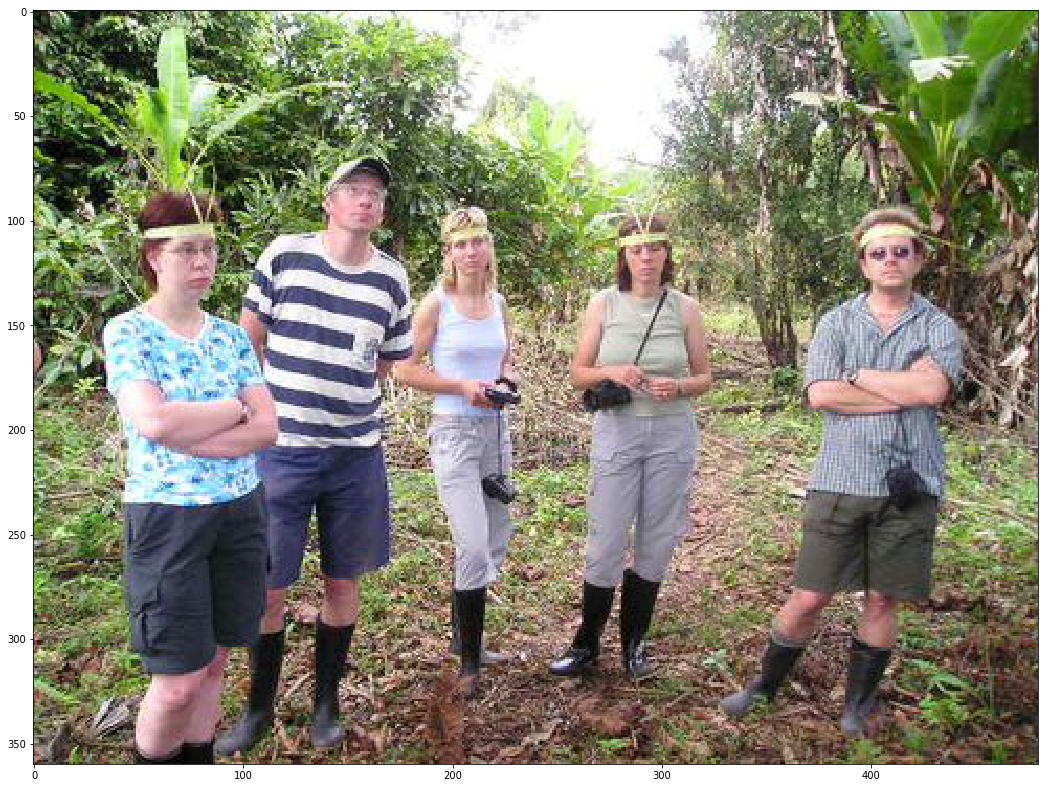

In [54]:
evaluator.display_caption()